In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
import json
import decimal
import boto3
from boto3.dynamodb.conditions import Key, Attr

In [73]:
dynamodb = boto3.resource('dynamodb')
post_table = dynamodb.Table('posts')
comment_table = dynamodb.Table('comments')

In [104]:
# Helper class to convert a DynamoDB item to JSON.
class DecimalEncoder(json.JSONEncoder):
    def default(self, o):
        if isinstance(o, decimal.Decimal):
            if o % 1 > 0:
                return float(o)
            else:
                return int(o)
        return super(DecimalEncoder, self).default(o)



posts = []
    
response = post_table.scan(
    )

for i in response['Items']:
    posts.append(json.loads(json.dumps(i, cls=DecimalEncoder)))

while 'LastEvaluatedKey' in response:
    response = post_table.scan(
        ExclusiveStartKey=response['LastEvaluatedKey']
        )

    for i in response['Items']:
        posts.append(json.loads(json.dumps(i, cls=DecimalEncoder)))

In [105]:
df = pd.DataFrame(posts)

In [106]:
df

,post_user,subreddit,post_date,score,votes_up,url,awards,votes_down,post_id,gilded,votes_ratio,body,title
0,t2_4jnmb2pn,AmItheAsshole,1571390779,0,0,https://www.reddit.com/r/AmItheAsshole/comment...,[],0,t3_djg47s,0,0.44,I get my eyebrows done at this extremely inexp...,Wibta for citing hygiene as a reason I no long...
1,t2_1cxlh25,pettyrevenge,1559565933,67,69,https://www.reddit.com/r/pettyrevenge/comments...,[],0,t3_bw6qlh,0,0.89,So to set the scene my friend goes to a Britis...,Whole school gets petty
2,t2_2n7oobpq,ProRevenge,1551878031,1,3,https://www.reddit.com/r/ProRevenge/comments/a...,[],0,t3_axv3mf,0,0.51,"Strap in ladies and gents, this is a long one....",You groom my sister I groom my fist against yo...
3,t2_qwqgq3x,AmItheAsshole,1571991644,0,0,https://www.reddit.com/r/AmItheAsshole/comment...,[],0,t3_dmphfn,0,0.40,I was at lunch with co-workers. Both men and ...,AITA for poking fun at how I met my spouse wit...
4,*unknown,pettyrevenge,1560255263,1827,1827,https://www.reddit.com/r/pettyrevenge/comments...,[],0,t3_bz7uh0,0,0.96,G'day mates! \n\nI'm typing this on mobile and...,You'll have to give my thing back although I w...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8492,t2_3esfn9la,tifu,1571415097,37,35,https://www.reddit.com/r/tifu/comments/djkdti/...,[],0,t3_djkdti,0,0.96,So I've been seeing this girl for a few weeks ...,TIFU by nearly killing a puppy
8493,t2_3oj80kqm,tifu,1572223922,4,2,https://www.reddit.com/r/tifu/comments/dnw38i/...,[],0,t3_dnw38i,0,0.75,"On mobile so sorry if formating is wrong, also...",TIFU by eating cake in an (apparently) uncivil...
8494,t2_1n8zpta0,confession,1565710572,12,12,https://www.reddit.com/r/confession/comments/c...,[],0,t3_cpprzq,0,0.77,"Okay, I don't know how many of us did that but...","When I was a kid, my sister and I prank called..."
8495,t2_37b2poik,AmItheAsshole,1572405776,1,1,https://www.reddit.com/r/AmItheAsshole/comment...,[],0,t3_douqkk,0,0.56,Generally I sometimes see people who post thei...,AITA for ignoring possible cries for help on s...


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8497 entries, 0 to 8496
Data columns (total 13 columns):
post_user      8497 non-null object
subreddit      8497 non-null object
post_date      8497 non-null int64
score          8497 non-null int64
votes_up       8497 non-null int64
url            8497 non-null object
awards         8497 non-null object
votes_down     8497 non-null int64
post_id        8497 non-null object
gilded         8497 non-null int64
votes_ratio    8497 non-null float64
body           8497 non-null object
title          8497 non-null object
dtypes: float64(1), int64(5), object(7)
memory usage: 863.1+ KB


In [108]:
df.post_date = pd.to_datetime(df.post_date,unit='s')

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8497 entries, 0 to 8496
Data columns (total 13 columns):
post_user      8497 non-null object
subreddit      8497 non-null object
post_date      8497 non-null datetime64[ns]
score          8497 non-null int64
votes_up       8497 non-null int64
url            8497 non-null object
awards         8497 non-null object
votes_down     8497 non-null int64
post_id        8497 non-null object
gilded         8497 non-null int64
votes_ratio    8497 non-null float64
body           8497 non-null object
title          8497 non-null object
dtypes: datetime64[ns](1), float64(1), int64(4), object(7)
memory usage: 863.1+ KB


I am wondering if there is anything noticable about gilded posts.  Going to do some very basic analysis to see.  This means I will be doing some NLP.  But first I need to see how things break down.

In [110]:
df[df.gilded > 0]

,post_user,subreddit,post_date,score,votes_up,url,awards,votes_down,post_id,gilded,votes_ratio,body,title
6,t2_2bwoda3d,ProRevenge,2019-04-04 22:52:28,1001,1009,https://www.reddit.com/r/ProRevenge/comments/b...,"[{'end_date': None, 'icon_url': 'https://www.r...",0,t3_b9dp98,1,0.97,I've been playing the Yu-Gi-Oh trading card ga...,Game shop bully gets taught a lesson in humility.
42,t2_3x1pxk2u,ProRevenge,2019-06-10 05:44:22,17009,17006,https://www.reddit.com/r/ProRevenge/comments/b...,"[{'end_date': None, 'icon_url': 'https://www.r...",0,t3_bypj9w,5,0.94,Insert obligatory throwaway account explanatio...,"Entitled, gossipy witch sabotages my totally l..."
140,t2_lmilpnf,pettyrevenge,2019-09-22 09:05:10,7417,7405,https://www.reddit.com/r/pettyrevenge/comments...,"[{'end_date': None, 'icon_url': 'https://www.r...",0,t3_d7jltg,2,0.98,There was a guy I used to like in school. He w...,You bullied me? What was your name?
193,t2_42foo4yt,ProRevenge,2019-08-05 20:18:15,5456,5451,https://www.reddit.com/r/ProRevenge/comments/c...,"[{'end_date': None, 'icon_url': 'https://www.r...",0,t3_cma97j,1,0.98,I have had migraines since I was 3 or 4. Somet...,Attack Me? Get Ready for Doom
217,t2_jysx6,ProRevenge,2019-05-29 14:13:00,4300,4299,https://www.reddit.com/r/ProRevenge/comments/b...,"[{'end_date': None, 'icon_url': 'https://www.r...",0,t3_bub3ac,1,0.87,So back in my 20's I worked for a large nation...,boss mistreats new guys so new guys get boss d...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8392,t2_25a1epyu,ProRevenge,2019-04-12 12:10:17,2640,2639,https://www.reddit.com/r/ProRevenge/comments/b...,"[{'end_date': None, 'icon_url': 'https://www.r...",0,t3_bc9chd,3,0.97,Obligatory mobile formating error and first ti...,File a false restraining order against me and ...
8403,t2_32gajxqb,AmItheAsshole,2019-10-20 05:46:04,4537,4542,https://www.reddit.com/r/AmItheAsshole/comment...,"[{'end_date': None, 'icon_url': 'https://www.r...",0,t3_dka7oq,1,0.93,My stand partner (in orchestra) was telling me...,AITA for telling someone that ocd and being “a...
8411,t2_hah2i,pettyrevenge,2019-10-01 05:52:32,3103,3104,https://www.reddit.com/r/pettyrevenge/comments...,"[{'end_date': None, 'icon_url': 'https://www.r...",0,t3_dbiyx5,1,0.98,This happened when we were Juniors together in...,"""Best Friend"" tries to blackmail me to my LEO dad"
8459,t2_3seo6q2i,pettyrevenge,2019-10-15 10:30:17,7636,7631,https://www.reddit.com/r/pettyrevenge/comments...,"[{'end_date': None, 'icon_url': 'https://www.r...",0,t3_di1a9a,1,0.95,Tonight I went out with my teacher and a few o...,Foreign waiter was rude in his language so I r...


In [111]:
df.subreddit.value_counts()

AmItheAsshole    3438
tifu             1944
confession       1113
pettyrevenge     1043
ProRevenge        959
Name: subreddit, dtype: int64

In [112]:
df.gilded.value_counts()

0     8134
1      244
2       60
3       26
4       13
5        6
6        5
7        2
10       2
15       1
13       1
28       1
18       1
8        1
Name: gilded, dtype: int64

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8497 entries, 0 to 8496
Data columns (total 13 columns):
post_user      8497 non-null object
subreddit      8497 non-null object
post_date      8497 non-null datetime64[ns]
score          8497 non-null int64
votes_up       8497 non-null int64
url            8497 non-null object
awards         8497 non-null object
votes_down     8497 non-null int64
post_id        8497 non-null object
gilded         8497 non-null int64
votes_ratio    8497 non-null float64
body           8497 non-null object
title          8497 non-null object
dtypes: datetime64[ns](1), float64(1), int64(4), object(7)
memory usage: 863.1+ KB


In [114]:
df['is_gilded'] = df.gilded > 0

In [117]:
print('Percent Gilded: {}'.format((df.is_gilded.sum() / df.shape[0])*100))

Percent Gilded: 4.272096033894315


SO only about 4% are gilded.  This is going to be difficult work with but its a starting place.

In [116]:
df.pivot_table(index='is_gilded', columns='subreddit',aggfunc='count')['body']

subreddit,AmItheAsshole,ProRevenge,confession,pettyrevenge,tifu
is_gilded,,,,,
False,3429,710,1101,996,1898
True,9,249,12,47,46


It seems that the layout of this data is very specifically swayed to ProRevenge which is going to be an even bigger problem to deal with.  I am not sure why this seems to be so lopsided but will have to look into. 

In [120]:
df.score.value_counts()

0        767
2        472
3        464
1        411
4        327
        ... 
3917       1
22374      1
3997       1
8103       1
2039       1
Name: score, Length: 1440, dtype: int64

In [124]:
(df.score > 500).sum() / df.shape[0]

0.13122278451218078

In [ ]:
May be easer. Will have to look into

Text(0.5, 1.0, 'Votes Ration')

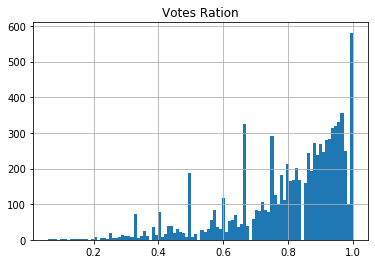

In [127]:
df.votes_ratio.hist(bins=100)
plt.title('Votes Ratio')